# Summarizing used Python libraries
This notebook demonstrates how one can dive into summarizing generated code, in this case which Python libraries were used. The `_result.jsonl` files contain a column `completion`, which contains Python code as string. These code snipptes can be summarized for each model as shown here, e.g. by searching for common Python libraries.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"
# if you want to investigate a single model only, add its name here:
search_term = ""

# Enter the terms to search for here
common_libraries = [
'numpy',
'skimage',
'cv2',
'pandas',
'pyclesperanto_prototype',
'vedo',
'umap_learn',
'dask',
'zarr',
'circle_fit',
'statsmodels',
'xarray',
'pillow',
'nibabel']




First we collect all results and the corresponding models from the jsonl files.

In [3]:
collection = []
for filename in os.listdir(directory):
    if search_term in filename and filename.endswith("_results.jsonl"):
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace("samples_","").replace("_results","").replace(".jsonl","")
        collection.append(df)

if len(collection) == 1:
    df = collection[0]
else:
    df = pd.concat(collection)

In [4]:
df

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\n# Plan:\n# 1. Convert the image to grayscale...,"Here's the completed code with the plan, libra...",failed: OpenCV(4.9.0) D:\a\opencv-python\openc...,False,claude-3-opus-20240229
1,../test_cases/binary_closing.ipynb,\n# Plan:\n# 1. Perform binary dilation on the...,"Here's the completed code with a plan, importe...",passed,True,claude-3-opus-20240229
2,../test_cases/convex_hull_measure_area.ipynb,\n# Plan:\n# 1. Convert the point cloud to a n...,"Here is the complete code with a plan, importe...",passed,True,claude-3-opus-20240229
3,../test_cases/convolve_images.ipynb,\n# Plan:\n# 1. Import necessary libraries (nu...,"Here's the completed code with a plan, importe...",passed,True,claude-3-opus-20240229
4,../test_cases/count_number_of_touching_neighbo...,\n# Plan:\n# 1. Find the unique labels in the ...,"Here's the completed code with a plan, necessa...",failed:,False,claude-3-opus-20240229
...,...,...,...,...,...,...
465,../test_cases/worflow_segmentation_measurement...,\n import skimage\n import numpy as np\n...,\n import skimage\n import numpy as np\n...,passed,True,reference
466,../test_cases/worflow_watershed_segmentation_c...,\n import skimage\n blurred = skimage.fi...,\n import skimage\n blurred = skimage.fi...,passed,True,reference
467,../test_cases/workflow_batch_process_folder_co...,\n import os\n from skimage.io import im...,\n import os\n from skimage.io import im...,passed,True,reference
468,../test_cases/workflow_batch_process_folder_me...,\n import os\n import pandas as pd\n ...,\n import os\n import pandas as pd\n ...,passed,True,reference


In [5]:
# Just some examples to get an idea
df.head(3)['completion'].tolist()

['\n# Plan:\n# 1. Convert the image to grayscale if it\'s not already\n# 2. Apply Otsu\'s thresholding method to the grayscale image to obtain a binary image\n# 3. Count the number of positive (white) pixels in the binary image\n# 4. Return the count of positive pixels\n\nimport cv2\nimport numpy as np\n\ndef apply_otsu_threshold_and_count_postiive_pixels(image):\n    """\n    Takes an image, applies Otsu\'s threshold method to it to create a binary image and \n    counts the positive pixels.\n    """\n    # Step 1: Convert the image to grayscale if it\'s not already\n    if len(image.shape) > 2:\n        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    else:\n        gray_image = image\n\n    # Step 2: Apply Otsu\'s thresholding method to the grayscale image\n    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n    # Step 3: Count the number of positive (white) pixels in the binary image\n    positive_pixels = np.sum(binary_image == 

## Searching for common terms
First, we search the generated code for the common libraries as specified above.

In [6]:
# Define the function to count errors
def count_libs(group, lib_list):
    counts = {lib: group['completion'].str.contains(lib, regex=False).sum() for lib in lib_list}
    return pd.Series(counts)

# Apply the function to each model group
lib_counts = df.groupby('model').apply(count_libs, lib_list=common_libraries)

# Transpose the result for the desired format: models as columns, libs as rows
lib_counts = lib_counts.T

In [7]:
lib_counts

model,Mistral-7B-Instruct-v0.2,claude-3-opus-20240229,codellama,gemini-pro,gpt-3.5-turbo-1106,gpt-4-1106-preview,gpt-4-turbo-2024-04-09,reference
numpy,407,387,386,112,308,341,374,190
skimage,57,109,77,53,110,137,115,210
cv2,90,45,138,86,131,57,75,0
pandas,47,79,76,40,73,81,80,50
pyclesperanto_prototype,0,0,0,0,0,0,0,40
vedo,0,0,0,0,0,0,0,20
umap_learn,0,0,0,0,0,0,0,0
dask,0,0,0,0,0,0,0,0
zarr,0,0,0,0,0,0,0,0
circle_fit,0,0,0,0,0,0,0,0


In [8]:
lib_counts.columns

Index(['Mistral-7B-Instruct-v0.2', 'claude-3-opus-20240229', 'codellama',
       'gemini-pro', 'gpt-3.5-turbo-1106', 'gpt-4-1106-preview',
       'gpt-4-turbo-2024-04-09', 'reference'],
      dtype='object', name='model')

In [9]:
lib_counts.index

Index(['numpy', 'skimage', 'cv2', 'pandas', 'pyclesperanto_prototype', 'vedo',
       'umap_learn', 'dask', 'zarr', 'circle_fit', 'statsmodels', 'xarray',
       'pillow', 'nibabel'],
      dtype='object')

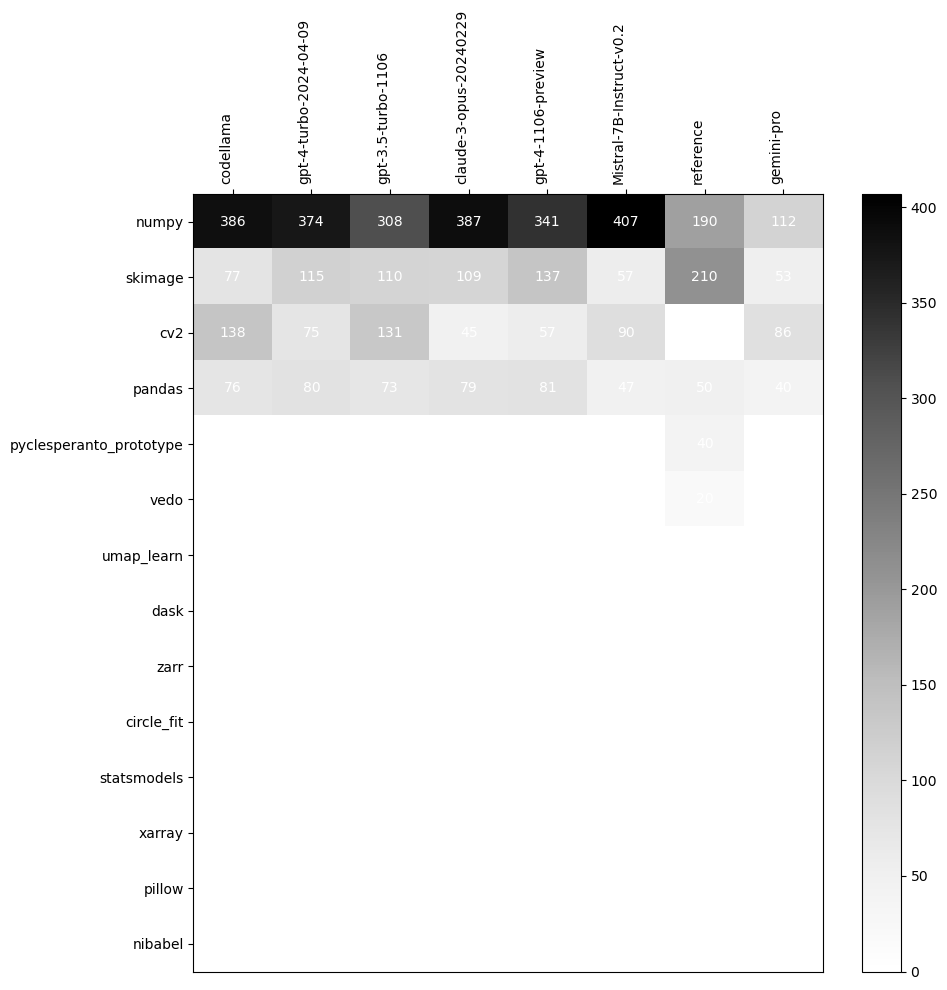

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = lib_counts.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
numerical_data = numerical_data[mean_values.index]

str_column_values = lib_counts.index

# Plotting
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.imshow(numerical_data, cmap='Greys', aspect='auto')

# Annotating each cell with the corresponding value
for (i, j), val in np.ndenumerate(numerical_data):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white')

# Setting the column names as x-axis labels
ax.set_xticks(np.arange(len(numerical_data.columns)))
ax.set_xticklabels(numerical_data.columns)

# Setting the string column values as y-axis labels
ax.set_yticks(np.arange(len(str_column_values)))
ax.set_yticklabels(str_column_values)

# Rotating the tick labels for better visibility
ax.xaxis.tick_top()
plt.xticks(rotation=90, ha="right")

# Showing the color bar and tight_layout for neatness
fig.colorbar(cax)
plt.tight_layout()

plt.savefig("used_libraries")
plt.show()